# Library imports & some helpful function definition

In [180]:
%matplotlib inline
from PIL import Image
from PIL.Image import open as PIL_open
import numpy as np
import os
import streamlit as st
import math
import matplotlib.pyplot as plt
from tkinter import *
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path

from skimage.data import shepp_logan_phantom
from skimage.transform import radon, rescale
from skimage.draw import line_nd

def is_bmp(file_name):
    root , extension = os.path.splitext(file_name)
    return extension.lower() == '.bmp', root

def deg_to_grad(x):
    return x/360 * 2 * math.pi

def central_to_left_upper_x(central_x, width):
    left_upper_x = central_x + width // 2
    
    return left_upper_x

def central_to_left_upper_y(central_y, height):
    left_upper_y = abs(central_y - height // 2)
    
    return left_upper_y

'''
def bres(x1,y1,x2,y2, width, height):
    
    x,y = x1,y1
    dx = abs(x2 - x1)
    dy = abs(y2 -y1)
    
    if(dx == 0): dx = 1
    
    gradient = dy/float(dx)

        
    if gradient > 1:
        dx, dy = dy, dx
        x, y = y, x
        x1, y1 = y1, x1
        x2, y2 = y2, x2

    p = 2*dy - dx
    # print(f"x = {x}, y = {y}")
    
    # Initialize the plotting points
    xcoordinates = [x]
    ycoordinates = [y]

    for k in range(2, dx + 2):
        if p > 0:
            y = y + 1 if y < y2 else y - 1
            p = p + 2 * (dy - dx)
        else:
            p = p + 2 * dy

        x = x + 1 if x < x2 else x - 1

        # print(f"x = {x}, y = {y}")     
        # print(f"x = {central_to_left_upper_x(x, width)}, y = {central_to_left_upper_y(y, height)}")
        xcoordinates.append(central_to_left_upper_x(x, width))
        ycoordinates.append(central_to_left_upper_y(y, height))

    x1 = central_to_left_upper_x(x1, width)
    x2 = central_to_left_upper_x(x2, width)
    y1 = central_to_left_upper_y(y1, height)
    y2 = central_to_left_upper_y(y2, height)
    
    ycoordinates, xcoordinates = line_nd((y1,x1), (y2,x2), endpoint = True, integer = True)
    return [xcoordinates, ycoordinates]
'''

'\ndef bres(x1,y1,x2,y2, width, height):\n    \n    x,y = x1,y1\n    dx = abs(x2 - x1)\n    dy = abs(y2 -y1)\n    \n    if(dx == 0): dx = 1\n    \n    gradient = dy/float(dx)\n\n        \n    if gradient > 1:\n        dx, dy = dy, dx\n        x, y = y, x\n        x1, y1 = y1, x1\n        x2, y2 = y2, x2\n\n    p = 2*dy - dx\n    # print(f"x = {x}, y = {y}")\n    \n    # Initialize the plotting points\n    xcoordinates = [x]\n    ycoordinates = [y]\n\n    for k in range(2, dx + 2):\n        if p > 0:\n            y = y + 1 if y < y2 else y - 1\n            p = p + 2 * (dy - dx)\n        else:\n            p = p + 2 * dy\n\n        x = x + 1 if x < x2 else x - 1\n\n        # print(f"x = {x}, y = {y}")     \n        # print(f"x = {central_to_left_upper_x(x, width)}, y = {central_to_left_upper_y(y, height)}")\n        xcoordinates.append(central_to_left_upper_x(x, width))\n        ycoordinates.append(central_to_left_upper_y(y, height))\n\n    x1 = central_to_left_upper_x(x1, width)\n    x2

* Importing image
* converting & saving to .bmp format 
* generating pixel grayness matrix

RESOLUTION OF YOUR IMAGE IS:  1024  X  1024


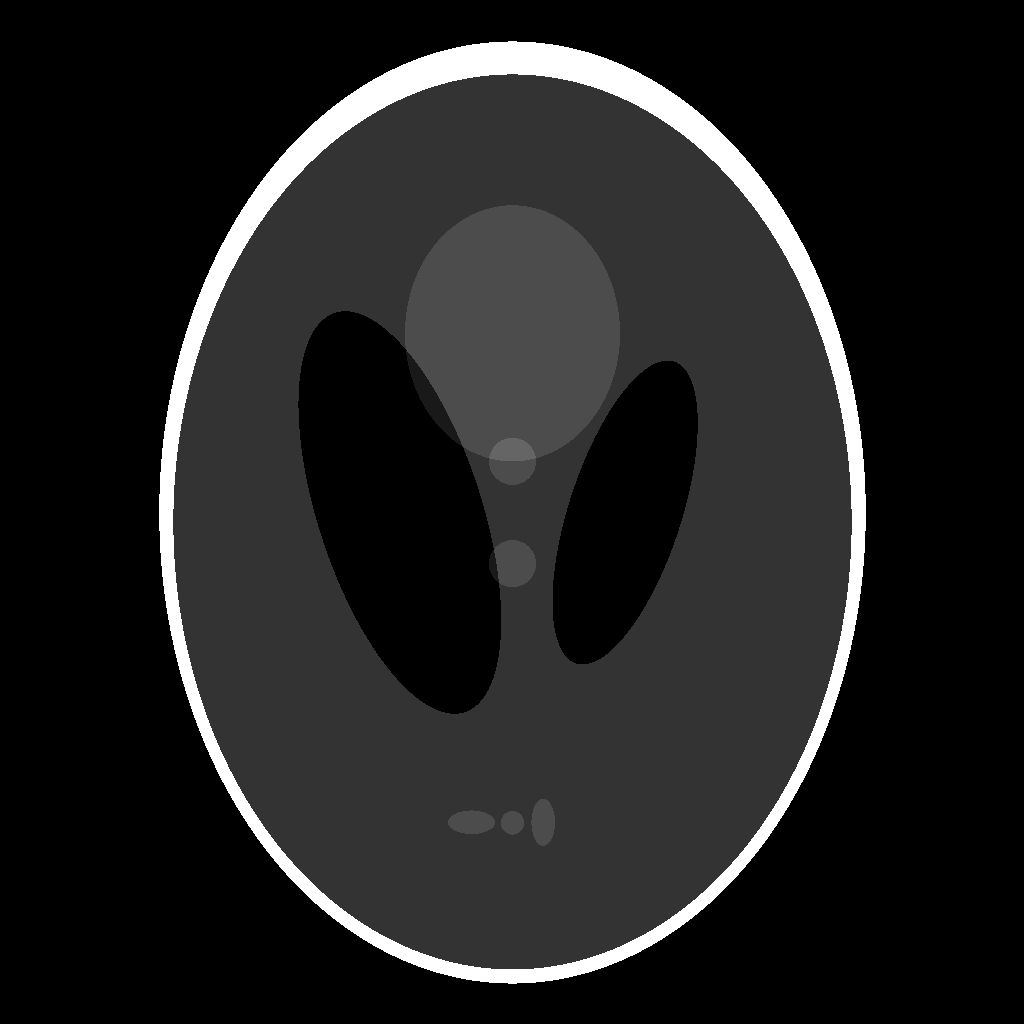

In [181]:
image_name_jpeg = 'Shepp_logan.jpg'
image_jpeg = PIL_open(image_name_jpeg)
width, height = image_jpeg.size
print("RESOLUTION OF YOUR IMAGE IS: ", width, " X ", height)

a, b = is_bmp(image_name_jpeg)
path = Path(b + ".bmp")
image_name_bmp = str(b) + '.bmp'
grayscale_image = image_jpeg.convert('L')

if not a:
    if not path.exists():
        grayscale_image.save(image_name_bmp)

image_bmp = PIL_open(image_name_bmp)
pixel_data = list(image_bmp.getdata())
    
# każdy pixel top wartość od 0 - 255, tym bliżej 0 tym bardziej pixel jest czarny (nasycenie)
d = min(width, height)  # diameter equal to shorter side of our image
b = max(width, height)

pixel_array = np.array(pixel_data)
pixel_matrix = pixel_array.reshape(height, width)
np.set_printoptions(threshold=np.inf)

if width > height:
    if (b - d) % 2 == 0:
        pixel_matrix = pixel_matrix[:, int((b-d)/2): -int((b-d)/2)]
    else:
        pixel_matrix = pixel_matrix[:, int((b-d)/2) + 1 : -int((b-d)/2)]
elif height > width:
    if (b - d) % 2 == 0:
        pixel_matrix = pixel_matrix[int((b-d)/2) : -int((b-d)/2), :]
    else:
        pixel_matrix = pixel_matrix[int((b-d)/2) + 1 : -int((b-d)/2), :]

display(image_bmp)

# Parameters definitions:

In [182]:
l = 90  # rozpiętość kątowa
x = 180  # ilość skanów
n = 160  # ilość detektorów

emitter_rotation = 360 / x
l_grad = deg_to_grad(l)

# Line Generation for every emitter - detector combination:

In [183]:
r = d / 2
line_matrix = np.full((n, x), None, dtype = object)

# line generation for every emitter - detector combination
for alpha in range(0, 360, int(emitter_rotation)):

    alpha_pom = deg_to_grad(alpha)
    emitter_position_x = int(central_to_left_upper_x(r * math.cos(alpha_pom), d))
    emitter_position_y = int(central_to_left_upper_y(r * math.sin(alpha_pom), d))    

    for i in range(0, n):
        detector_position_x = int(central_to_left_upper_x(r * math.cos(alpha_pom + math.pi - l_grad/2 + (i * (l_grad / (n - 1)))), d))
        detector_position_y = int(central_to_left_upper_y(r * math.sin(alpha_pom + math.pi - l_grad/2 + (i * (l_grad / (n - 1)))), d))
        line = line_nd((emitter_position_y, emitter_position_x), (detector_position_y, detector_position_x), endpoint = True, integer = True)
        line_matrix[i][int(alpha/emitter_rotation)] = line

# Visualization

'\nfor j in range(len(lines)):\n    single_line = lines[j]\n    for i in range(len(single_line[0])):\n        s[single_line[1][i] - 1][single_line[0][i] - 1] = 255\n\nplt.imshow(s)\n'

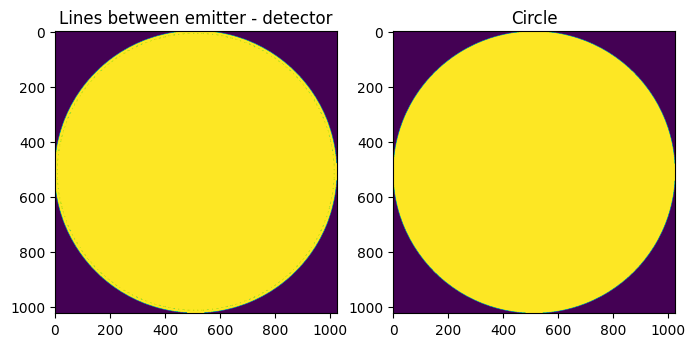

In [184]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 4.5))

s = np.zeros(shape = (d, d))
for i in range(n):
    for j in range(x):
        for k in range(len(line_matrix[i][j][0])):

            # print(line_matrix[i][j][0], ' ', line_matrix[i][j][1])
            if line_matrix[i][j][0][k] != 0 or line_matrix[i][j][1][k] != 0:
                s[line_matrix[i][j][0][k] - 1][line_matrix[i][j][1][k] - 1] = 255
            else:    
                s[line_matrix[i][j][0][k]][line_matrix[i][j][1][k]] = 255
                
ax1.imshow(s)
ax1.set_title("Lines between emitter - detector")
w = np.zeros(shape = (d, d))
center_x, center_y = d/2, d/2
x_coord = np.arange(d)
y_coord = np.arange(d)
xx, yy = np.meshgrid(x_coord, y_coord)
distance_from_center = np.sqrt((xx - center_x) ** 2 + (yy - center_y) ** 2)
w[distance_from_center <= r] = 255
ax2.imshow(w)
ax2.set_title("Circle")

# Summing + normalizing all pixels' grayness for each line

In [185]:
# iterate over every detector
for i in range(n):
    # iteration over every position of emitter
    for j in range(len(line_matrix[i])):
        sum_of_pixels_for_line = 0
        # iteration over every pixel of a line
        for k in range(len(line_matrix[i][j][0])):
            sum_of_pixels_for_line += pixel_matrix[line_matrix[i][j][0][k] - 1][line_matrix[i][j][1][k] - 1]
        # each cell = sum of pixels for single detector's position
        line_matrix[i][j] = sum_of_pixels_for_line

# normalization
max_value = np.amax(line_matrix)
min_value = np.amin(line_matrix)

'''
print(f"{min_value = } {max_value = }")
print(f"{line_matrix = }")
'''

for i in range(n):
    line_matrix[i] = ((line_matrix[i] - min_value) / (max_value - min_value)) * 255
# print(f"{line_matrix = }")

# Visualization and comparison to built-in function


[[117 122 127 129 132 132 134 135 136 136 137 129 123 120 116 114 111 107
  107 104 101  98  94  94  89  88  84  80  76  72  67  64  57  52  51  56
   63  66  74  78  79  83  79  80  85  89  91  94  95 100  99 102 103 104
  104 107 109 110 114 119 124 140 147 147 141 137 132 127 120 115 112 107
  100  89  84  77  69  60  41  36  38  37  39  44  44  47  49  51  55  56
   57  61  62  65  65  67  70  72  72  75  77  79  81  81  87  92  90  88
   89  89  86  84  83  80  79  76  75  71  68  67  62  59  58  54  53  59
   67  73  82  88  97 102 106 113 120 124 130 133 141 145 149 154 154 159
  160 163 165 164 164 163 151 143 136 131 127 122 118 113 110 105  98 104
  100  97  92  87  80  75  68  63  69  77  80  87  92  96  99 105 108 112]
 [116 121 127 130 132 134 135 136 137 138 138 125 121 117 115 112 111 108
  105 104 101  97  96  93  89  86  83  79  76  71  66  64  57  54  52  57
   64  69  73  77  80  82  82  81  86  88  91  93  97 100 101 101 104 104
  106 105 108 108 109 113 116 129 146

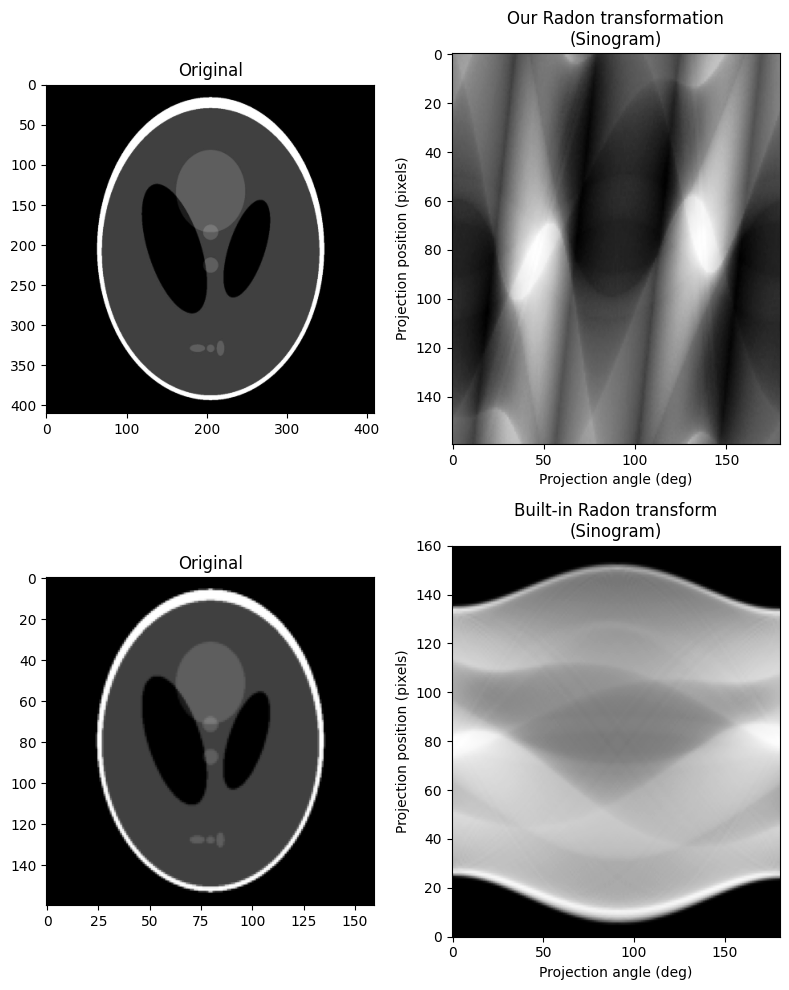

In [186]:
sinogram = line_matrix.astype(np.uint32)
print(sinogram)

# built-in function image 
image = shepp_logan_phantom()
image = rescale(image, scale=0.4, mode='reflect', channel_axis=None)

# plotting
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(8, 10))
    # our transformation
image_rescaled = rescale(np.array(image_jpeg), scale=0.4, mode='reflect', channel_axis=None)
ax1.set_title("Original")
ax1.imshow(image_rescaled, cmap=plt.cm.Greys_r)

ax2.set_title("Our Radon transformation\n(Sinogram)")
ax2.set_xlabel("Projection angle (deg)")
ax2.set_ylabel("Projection position (pixels)")
ax2.imshow(
    sinogram,
    cmap=plt.cm.Greys_r,
    aspect='auto',
)

    # built-in transformation
ax3.set_title("Original")
ax3.imshow(image, cmap=plt.cm.Greys_r)

ax4.set_title("Original")
ax4.imshow(image, cmap=plt.cm.Greys_r)

theta = np.linspace(0.0, 180.0, max(image.shape), endpoint=False)
sinogram_two = radon(image, theta=theta)
dx, dy = 0.5 * 180.0 / max(image.shape), 0.5 / sinogram.shape[0]
ax4.set_title("Built-in Radon transform\n(Sinogram)")
ax4.set_xlabel("Projection angle (deg)")
ax4.set_ylabel("Projection position (pixels)")
ax4.imshow(
    sinogram_two,
    cmap=plt.cm.Greys_r,
    extent=(-dx, 180.0 + dx, -dy, sinogram.shape[0] + dy),
    aspect='auto',
)

fig.tight_layout()
plt.show()